In [1]:
import tessreduce as tr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
obs = tr.spacetime_lookup('04:19:24.800','-53:19:17.000')

!!! WARNING no MJD time specified, using default of 59000
|   Sector | Covers   |   Time difference  |
|          |          |             (days) |
|----------+----------+--------------------|
|        3 | False    |               -591 |
|        4 | False    |               -563 |
|        5 | False    |               -537 |
|       30 | False    |                114 |
|       31 | False    |                143 |
|       32 | False    |                172 |


getting TPF from TESScut
made reference
made source mask
calculating background
background subtracted
calculating centroids
!!Re-running for difference image!!
shifting images
remade mask
background
Field calibration
Target is below -30 dec, calibrating to SkyMapper photometry.


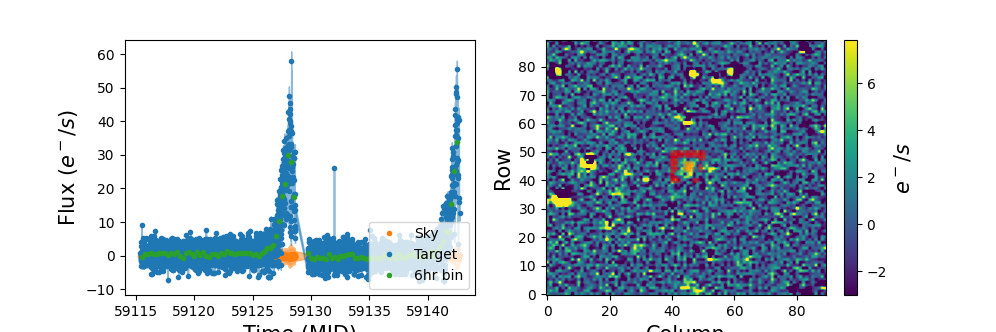

getting TPF from TESScut
made reference
made source mask
calculating background
background subtracted
calculating centroids
!!Re-running for difference image!!
shifting images
remade mask
background
Background correlation correction
Field calibration
Target is below -30 dec, calibrating to SkyMapper photometry.


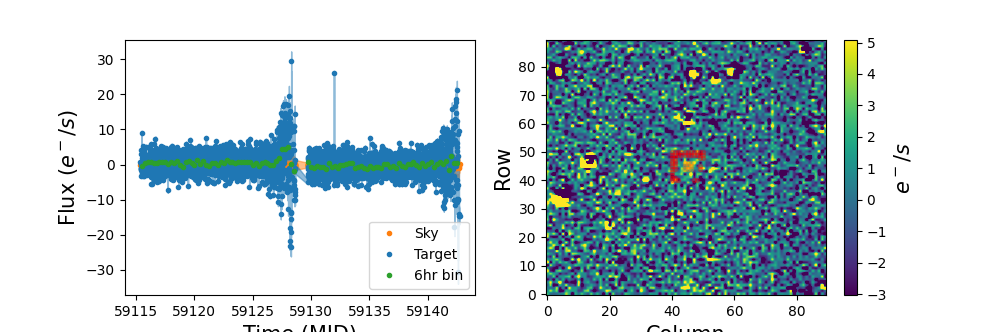

In [4]:
t1 = tr.tessreduce(obs_list=obs[3],corr_correction=False,reduce=True)
t2 = tr.tessreduce(obs_list=obs[3],corr_correction=True,reduce=True)

In [9]:
t1.bkg.shape

(3681, 90, 90)

In [19]:
t1.lc[1].max()/t1.bkg[:,45,45].max()

0.02980888245037421

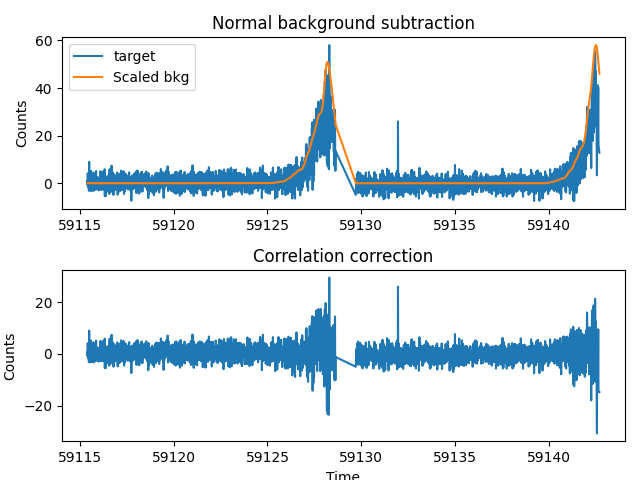

In [17]:
plt.figure()
plt.subplot(211)
plt.plot(t1.lc[0],t1.lc[1],label='target')
plt.plot(t1.lc[0],(t1.bkg[:,45,45]/t1.bkg[:,45,45].max())*t1.lc[1].max(),label='Scaled bkg')
plt.title('Normal background subtraction')
plt.legend()
plt.ylabel('Counts')

plt.subplot(212)
plt.plot(t2.lc[0],t2.lc[1])
plt.title('Correlation correction')
plt.tight_layout()
plt.ylabel('Counts')
plt.xlabel('Time')
plt.savefig('../paper_figs/correlation_correction_example.pdf')